# Cleaning and Preprocessing Data for Machine Learning

In [78]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [79]:
# Read the csv file into a pandas DataFrame

sumo = pd.read_csv('https://weir-project-3.s3.amazonaws.com/banzuke_clean.csv')
sumo_df.drop(sumo_df.columns[[0]],axis=1,inplace=True)
sumo.tail()

,Unnamed: 0,tournament_date,id,rank,wrestler,stable,birth_place,birth_date,height,weight,previous_rank,previous_wins,previous_losses
15394,168499,2021.05,12351,J12w,Nishikifuji,Isegahama,Aomori,1996-07-22,183.0,143.0,J12w,7.0,8.0
15395,168500,2021.05,12040,J13e,Daishoho,Oitekaze,Mongolia,1994-08-28,184.0,171.0,Ms2w,5.0,2.0
15396,168501,2021.05,6596,J13w,Nishikigi,Isenoumi,Iwate,1990-08-25,184.0,169.0,J13w,7.0,8.0
15397,168502,2021.05,12117,J14e,Bushozan,Fujishima,Ibaraki,1995-12-06,172.0,170.0,J14e,7.0,8.0
15398,168503,2021.05,12453,J14w,Oho,Otake,Tokyo,2000-02-14,191.0,170.0,Ms2e,4.0,3.0


In [80]:
from datetime import datetime, date

age_df = sumo[['birth_date']]

def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

age_df['age'] = age_df['birth_date'].apply(age)
del age_df['birth_date']
age_df.head()

,age
0,66
1,68
2,68
3,68
4,64


In [85]:
#del age_df['birth_date']
sumo_df = sumo.join(age_df, how="left")

sumo_df['winner'] = 0
sumo_df.tail()

,Unnamed: 0,tournament_date,id,rank,wrestler,stable,birth_place,birth_date,height,weight,previous_rank,previous_wins,previous_losses,age,winner
15394,168499,2021.05,12351,J12w,Nishikifuji,Isegahama,Aomori,1996-07-22,183.0,143.0,J12w,7.0,8.0,24,0
15395,168500,2021.05,12040,J13e,Daishoho,Oitekaze,Mongolia,1994-08-28,184.0,171.0,Ms2w,5.0,2.0,26,0
15396,168501,2021.05,6596,J13w,Nishikigi,Isenoumi,Iwate,1990-08-25,184.0,169.0,J13w,7.0,8.0,30,0
15397,168502,2021.05,12117,J14e,Bushozan,Fujishima,Ibaraki,1995-12-06,172.0,170.0,J14e,7.0,8.0,25,0
15398,168503,2021.05,12453,J14w,Oho,Otake,Tokyo,2000-02-14,191.0,170.0,Ms2e,4.0,3.0,21,0


In [86]:
sumo_df2 = sumo_df[["height", "weight", "age", "previous_wins", "previous_losses","winner"]]
sumo_df2.head()

,height,weight,age,previous_wins,previous_losses,winner
0,182.0,116.0,66,14.0,1.0,0
1,179.0,165.0,68,9.0,3.0,0
2,186.0,133.0,68,0.0,0.0,0
3,181.0,144.0,68,10.0,5.0,0
4,183.0,163.0,64,10.0,5.0,0


In [64]:
X = sumo_df[["height", "weight", "age", "previous_wins", "previous_losses","winnner"]]
y = sumo_df["winner"].values.reshape(-1, 1)
print(X.shape, y.shape)

(15399, 5) (15399, 1)


In [71]:
print(X)


       height  weight  age  previous_wins  previous_losses
0       182.0   116.0   66           14.0              1.0
1       179.0   165.0   68            9.0              3.0
2       186.0   133.0   68            0.0              0.0
3       181.0   144.0   68           10.0              5.0
4       183.0   163.0   64           10.0              5.0
...       ...     ...  ...            ...              ...
15394   183.0   143.0   24            7.0              8.0
15395   184.0   171.0   26            5.0              2.0
15396   184.0   169.0   30            7.0              8.0
15397   172.0   170.0   25            7.0              8.0
15398   191.0   170.0   21            4.0              3.0

[15399 rows x 5 columns]


In [69]:
print(y)

[['']
 ['']
 ['']
 ...
 ['']
 ['']
 ['']]


In [72]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data, columns=["rank"])
data_binary_encoded.head()

KeyError: ignored

We can encode multiple columns using `get_dummies`.

In [56]:
data = X.copy()

data_binary_encoded = pd.get_dummies(data)
data_binary_encoded.dtypes

height             float64
weight             float64
age                  int64
previous_wins      float64
previous_losses    float64
                    ...   
rank_Y1wYO           uint8
rank_Y2e             uint8
rank_Y2eHD           uint8
rank_Y2w             uint8
rank_Y2wHD           uint8
Length: 98, dtype: object

## Scaling and Normalization

The final step that we need to perform is scaling and normalization. Many algorithms will perform better with a normalized or scaled dataset. You may not see a difference with the Sklearn LinearRegression model, but other models that use gradient descent need normalization to help the algorithms converge to a local optima.

Sklearn provides a variety of scaling and normalization options. The two most common are minmax and StandardScaler. Use StandardScaler when you don't know anything about your data.

The first step is to split your data into Training and Testing using `train_test_split`.

In [88]:
from sklearn.model_selection import train_test_split

X = sumo_df2

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,height,weight,age,previous_wins,previous_losses,winner
2089,174.0,85.0,60,6.0,9.0,0
10158,192.6,153.2,36,15.0,0.0,0
1801,179.0,161.0,60,9.0,6.0,0
14128,182.0,140.0,26,9.0,6.0,0
12148,185.0,130.0,37,0.0,0.0,0


### StandardScaler

Now, we fit our StandardScaler model to our training data. We can apply this StandardScaler model to any future data. Note that we use this fit/transform approach so that we isolate our testing data from the training data that we use to fit our model. Otherwise, we might bias our model to the testing data. 

In [90]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
#y_scaler = StandardScaler().fit(y_train)

In [91]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
#y_train_scaled = y_scaler.transform(y_train)
#y_test_scaled = y_scaler.transform(y_test)

In [92]:
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

ValueError: ignored

StandardScaler applies a Gaussian distribution to our data where the mean is 0 and the standard deviation is 1. We can see the difference in the following plots.

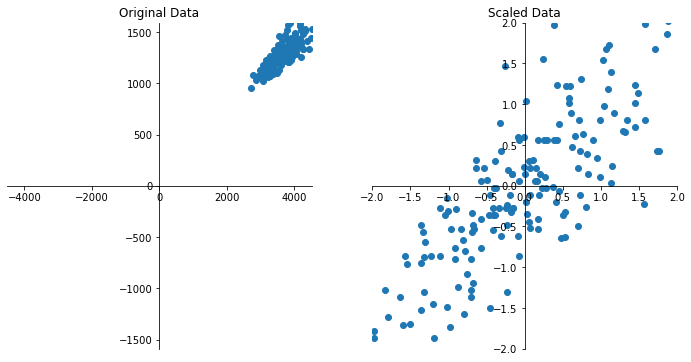

In [ ]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["size"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["size"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [ ]:
plt.show()

## Putting it all together

Step 1) Convert Categorical data to numbers using Integer or Binary Encoding

In [ ]:
X = pd.get_dummies(brain[["size", "gender", "age"]])
y = brain["weight"].values.reshape(-1, 1)
X.head()

,size,gender_Female,gender_Male,age_20-46,age_46+
0,4512,0,1,1,0
1,3738,0,1,1,0
2,4261,0,1,1,0
3,3777,0,1,1,0
4,4177,0,1,1,0


Step 2) Split data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Step 3) Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

Step 4) Fit the Model to the scaled training data and make predictions using the scaled test data

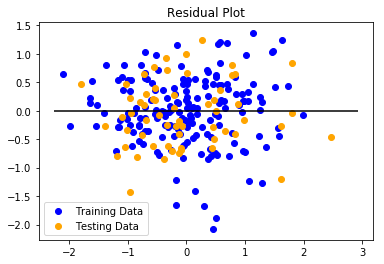

In [ ]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

Step 5) Quantify your model using the scaled data

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3230551580991294, R2: 0.6804912531419804


Your Turn!